# Improving the PyStructure

* Cleaning up unnecessary keys
* Imrpove the masking
* Improve the input

In [160]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append("./../../../Coding/General_Scripts/")
import PyStructure as ps

In [164]:
path = "./PyStructure/Output/ngc5194_data_struct_27as_2023_08_03.npy"
path = "./../PyStructure_v2/Output/ngc5194_data_struct_27as_2023_08_03.npy"
data = ps.PyStructure(path)


#wenn du hier die Koordinaten des Zentrums gibst, dann berechnet er die relativen RA und DEC bzgl. Zentrum (also \Delta RA, und \Delta Dec)
#du kannst auch keine koordianten geben (also die klammer einfach leer lassen)
ra, dec = data.get_coordinates("13:29:52.7 47:11:43")

* gal -> source **done**
* remove INT_RES_, INT_COV, **done**
* "SPEC_DESC_" just one entry **done**
* SPEC-DELTAV -> SPEC_DELTAV **done**
* generally just one SPEC_delta, vchan, etc. value
* add vaxis as key **done**

In [165]:
for key in data.struct.keys():
    print(key)

gal
ra_deg
dec_deg
dist_mpc
posang_deg
incl_deg
beam_as
rgal_as
rgal_kpc
rgal_r25
theta_rad
INT_VAL_SPIRE250
INT_UC_SPIRE250
INT_COV_SPIRE250
INT_RES_SPIRE250
INT_UNIT_SPIRE250
INT_DESC_SPIRE250
INT_TPEAK_SPIRE250
INT_RMS_SPIRE250
INT_MOM1_SPIRE250
INT_EMOM1_SPIRE250
INT_MOM2_SPIRE250
INT_EMOM2_SPIRE250
INT_EW_SPIRE250
INT_EEW_SPIRE250
SPEC_VAL_12CO21
SPEC_VCHAN0_12CO21
SPEC_DELTAV_12CO21
SPEC_UC_12CO21
SPEC_COV_12CO21
SPEC_RES_12CO21
SPEC_UNIT_12CO21
SPEC_DESC_12CO21
SPEC_TPEAK_12CO21
SPEC_RMS_12CO21
SPEC_VAL_12CO10
SPEC_VCHAN0_12CO10
SPEC_DELTAV_12CO10
SPEC_UC_12CO10
SPEC_COV_12CO10
SPEC_RES_12CO10
SPEC_UNIT_12CO10
SPEC_DESC_12CO10
SPEC_TPEAK_12CO10
SPEC_RMS_12CO10
SPEC_CRPIX_12CO21
SPEC_CRPIX_12CO10
SPEC_MASK_12CO21
INT_VAL_V12CO21
SPEC_MASK
INT_VAL_12CO21
INT_UC_12CO21
INT_COV_12CO21
INT_RES_12CO21
INT_UNIT_12CO21
INT_DESC_12CO21
INT_TPEAK_12CO21
INT_RMS_12CO21
INT_MOM1_12CO21
INT_EMOM1_12CO21
INT_MOM2_12CO21
INT_EMOM2_12CO21
INT_EW_12CO21
INT_EEW_12CO21
SPEC_VAL_SHUFF12CO21
SPEC_V

# procedure:
* iterate over each point. 
* check direct neighbours (minimal radial distance). start with 1 and then increment. 
* If it has a neighbour, label it accordingly.

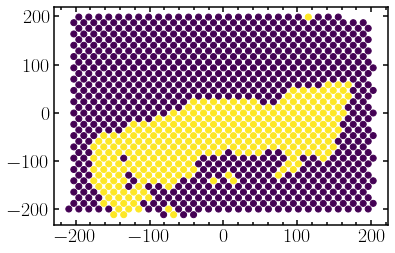

In [159]:
plt.scatter(ra, dec, c=data.struct["SPEC_MASK"][:,200])
plt.scatter(ra[422], dec[422], color="red")

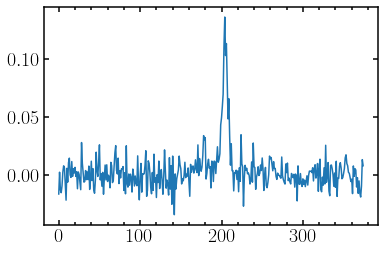

In [133]:
plt.plot(data.struct["SPEC_VAL_12CO21"][422,:])
#plt.plot(data.struct["SPEC_MASK"][422,:]*0.25)

In [137]:
mask_test = data.struct["SPEC_MASK"][:,200]

In [138]:
def dist(ra, dec, ra_c, dec_c):
    return np.sqrt((ra-ra_c)**2+(dec-dec_c)**2)

In [139]:
mask_labels=np.zeros_like(mask_test)
sep = data.struct["beam_as"]/2
label=1
for n in range(len(mask_labels)):
    if mask_labels[n]==0:
        if mask_test[n]==0:
            mask_labels[n]=-99
            continue
        
        dist_array=dist(ra, dec, ra[n], dec[n])
        #check out neighbours
        idx_neigh=np.where(abs(dist_array-sep)<0.1*data.struct["beam_as"])
        #check if labels have already been given (except 0 or -99)
        labels_given=np.unique(mask_labels[idx_neigh])
        index = labels_given[labels_given>0]
        if len(index)>0:
            mask_labels[n]=index[0]
            if len(index)>1:
                for i in range(len(index)-1):
                    mask_labels[mask_labels==index[i+1]]=index[0]
        else:
            mask_labels[n]=label
            label+=1

In [153]:
dist_array=dist(ra, dec, ra[200], dec[200])

In [157]:
np.sort(abs(dist_array-sep))[:10]*3600

array([9.49128581e-03, 9.49180354e-03, 4.82459484e+00, 4.83026471e+00,
       5.56598323e+00, 5.57331191e+00, 3.55667500e+04, 3.55706055e+04,
       3.55776718e+04, 3.55776718e+04])

In [140]:
np.unique(mask_labels)

array([-99,   1,   2,   5,   6,  10])

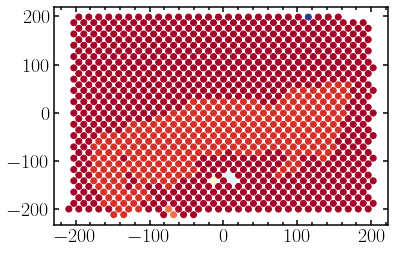

In [150]:
plt.scatter(ra, dec ,c=mask_labels, vmin=0, vmax=10, cmap="RdYlBu")
plt.scatter(ra[mask_labels==3], dec[mask_labels==3], color="r")
#plt.scatter(ra[351], dec[351], color="r" )
#plt.scatter(ra[321], dec[321], color="orange" )

In [148]:
mask_labels[mask_labels==-99]=0